In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/two_hands_keypoint_classifier/two_hands_keypoint.csv'
model_save_path = 'model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 5

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2 * 2, )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                6800      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 40)                3240      
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


19/23 [=======================>......] - ETA: 0s - loss: 55.4066 - accuracy: 0.2418  
Epoch 1: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
23/23 [==============================] - 2s 13ms/step - loss: 49.0751 - accuracy: 0.2599 - val_loss: 2.8338 - val_accuracy: 0.5015
Epoch 2/1000
18/23 [======================>.......] - ETA: 0s - loss: 9.8831 - accuracy: 0.4062 
Epoch 2: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
23/23 [==============================] - 0s 6ms/step - loss: 9.2425 - accuracy: 0.4204 - val_loss: 1.1405 - val_accuracy: 0.7688
Epoch 3/1000
 1/23 [>.............................] - ETA: 0s - loss: 6.4023 - accuracy: 0.4062

/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/23 [=======================>......] - ETA: 0s - loss: 4.9740 - accuracy: 0.5082
Epoch 3: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
23/23 [==============================] - 0s 7ms/step - loss: 4.8091 - accuracy: 0.5096 - val_loss: 0.2697 - val_accuracy: 0.8931
Epoch 4/1000
20/23 [=========================>....] - ETA: 0s - loss: 2.8720 - accuracy: 0.5836
Epoch 4: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
23/23 [==============================] - 0s 7ms/step - loss: 2.7929 - accuracy: 0.5909 - val_loss: 0.1537 - val_accuracy: 0.9784
Epoch 5/1000
15/23 [==================>...........] - ETA: 0s - loss: 2.3498 - accuracy: 0.5979
Epoch 5: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
23/23 [==============================] - 0s 8ms/step - loss: 2.2031 - accuracy: 0.6135 - val_loss: 0.1716 - val_accuracy: 0.9918
Epoch 6/1000
15/23 [==================>...........

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 2ms/step - loss: 1.0961e-04 - accuracy: 1.0000


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 89ms/step
[1.0000000e+00 2.2068558e-15 1.7999995e-10 4.2283857e-26 3.7312906e-21]
0


# 混同行列

31/31 [==============================] - 0s 2ms/step


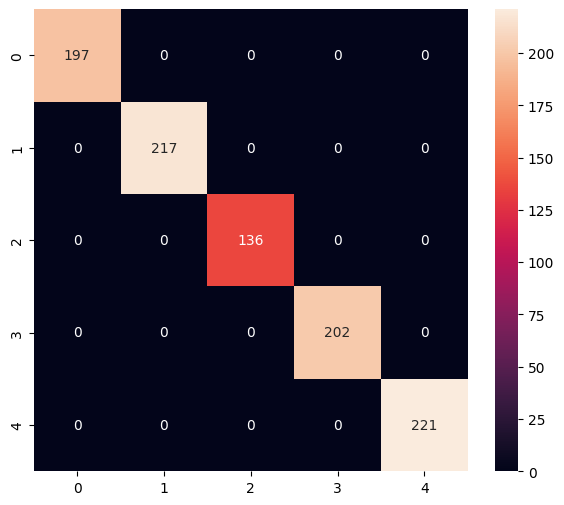

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       217
           2       1.00      1.00      1.00       136
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00       221

    accuracy                           1.00       973
   macro avg       1.00      1.00      1.00       973
weighted avg       1.00      1.00      1.00       973



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpwagqripj/assets


INFO:tensorflow:Assets written to: /tmp/tmpwagqripj/assets
2024-01-09 16:19:52.584758: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-09 16:19:52.584786: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-09 16:19:52.584989: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpwagqripj
2024-01-09 16:19:52.586754: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-09 16:19:52.586802: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpwagqripj
2024-01-09 16:19:52.590749: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-09 16:19:52.645882: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpwagqripj
2024-01-09 16:19:52.663204: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

17808

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 484 µs, sys: 36 µs, total: 520 µs
Wall time: 412 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0000000e+00 2.9260298e-15 3.7172748e-10 7.6268256e-26 6.1521158e-21]
0
